K-means is:
- Find K clusters from unlabeled data
- The algorithm learns from data => unsupervised learning algorithm

# Method:

1. Initialize the cluster centroids !

[image.png](attachment:193c12d2-3327-4814-88a8-1cec81b678a6.png) randomly:

2. Repeat until convergence (define a criteria):
    
    2.2. for each point x(i), we find its closest centroid mu
    
    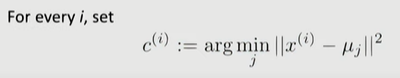
    
    2.3. assign mu's label "cluster c" to that point:

    
    2.4. for each cluster, we calculate the mean of all points that belong to that cluster (numerator), then we update it's centroid with the mean of all points:
    
    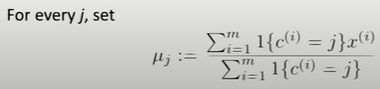
    
Criteria of convergence: Measure total movements of all the centroids, and define a threshold.
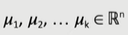

# Implementation
For clarity, better maintenance and optimization, the implementation is performed using a main function and helper functions.

## Helper functions

In [ ]:
def random_sample(low, high):
    return low + (high - low) * random.random() #random.random() sample a number uniformely distributed between 0 and 1 which is then scale between low and high

def initialize_centroids(data, k):
    '''Initialize the n data points region 
    Initialize the k centroids region randomly within the data point space
    return the centroids position
    Time Complexity : O(n + k) because k<<N ==> O(n)
    '''
    #Define the region of all data points:
    x_min = y_min = float('inf')
    x_max = y_max = float('-inf')
    for point in data: #look for all the data points once : Time complexity O(N)
        x_min = min(point[0], x_min)
        x_max = max(point[0], x_max)
        y_min = min(point[1], y_min)
        x_max = max(point[1], y_max)
    
    #Create a list of k centroids and sample them randomly within the range of all points
    centroids = []
    for i in range(k): #look for all the centroids once : Time complexity O(K)
        centroids.append([random_sample(x_min, x_max),
                         random_same(y_min, y_max)])
    return centroids

In [ ]:
def get_distance(point, centroid):
    """Calculate and return euclidean distance"""
    distance = ((point[0]-centroid[0])**2
                +(point[1]-centroid[1])**2)**0.5
    return distance

def get_label(data, centroids):
    '''
    Compute distance from one point to all centroid, 
    select the shortest distance, get the label, 
    and start with another point
    Time complexity: O(k * n)
    '''
    labels = []
    for point in data: #first loop goes through all the points : Time complexity O(n)
        min_distance = float('inf')
        label = None
        
        for i, centroid in enumerate(centroids): #second loop goes through all the centroids : Time complexity O(k)
            # Getting the distance between the point and the centroid
            new_distance = get_distance(point, centroid)
            
            if min_distance > new_distance:
                min_distance = new_distance
                label = i
            
            # Add the label to the label list:
            labels.append(label)
            
        return label
        

In [ ]:
def update_centroids(data, labels, k):
    '''
    update the centroids based on the mean 
    of the points assigned to the cluster
    Time complexity: O(n + k), k<<n => O(n)
    '''
    #Initialize the new centroids and counts of point for each cluster
    new_centroids = [[0,0] for i in range(k)]
    counts = [0] * k
    
    #Look through all data points and data vector to the new centroid and add to the count of point
    for point, label in zip(points, labels): # Loop goes through the data points : Time Complexity O(n)
        new_centroids[label][0] += point[0]
        new_centroids[label][1] += point[1]
        counts[label] += 1
    
    #Compute the average of x and y coordinates divided by the sum of the counts of points
    for i, (x, y) in enumerate(new_centroids): #Loop goes through the centroids : Time Complexity O(k)
        new_centroids[i] = (x / counts[i], y / counts[i])
        
    return new_centroids

In [ ]:
def should_stop(old_centroids, new_centroids, threshold=1e-5):
    '''takes the old centroids and updated centroids
    compute the total movement across all centroids
    returns true when total movement is less than a threshold
    Time complexity: O(k)
    '''
    total_movement = 0
    
    for old_point, new_point in zip(old_centroids, new_centroids): # loop over all centroids: Time complexity O(k)
        total_mouvement += get_distance(old_point, new_point)
        
    return total_movement < threshold

## Main function

In [ ]:
# main
def main(data, k):
    """
    Label n data points using k centroids
    Time complexity: O(k*n*l)
    with:
    - l: the number of iterations in the while loop
    - k: the number of clusters
    - n: the number of data points
    Space complexity O(k+n), ==> O(n) since k<<n 
    """
    #initialize centroids randomly
    centroids = initialize_centroids(data, k) #list to store k points : Space complexity O(k)
    
    while True:
        #find closest centroid for each point:
        old_centroids = centroids
        #label that point with the cluter name:
        labels = get_label(data, centroids) # O(k*n) list to store the cluster assigned to each data point: Space complexity O(n)
        #calculate the mean and update the centroid:
        centroids = update_centroids(data, labels, k)
        #Verify convergence:
        if should_stop(old_centroids, centroids):
            break
    
    return labels